In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

data = np.random.randn(1000)

(array([  3.,  18.,  50., 114., 226., 240., 206.,  92.,  42.,   9.]),
 array([-3.47304711, -2.82474184, -2.17643656, -1.52813129, -0.87982602,
        -0.23152074,  0.41678453,  1.0650898 ,  1.71339507,  2.36170035,
         3.01000562]),
 <BarContainer object of 10 artists>)

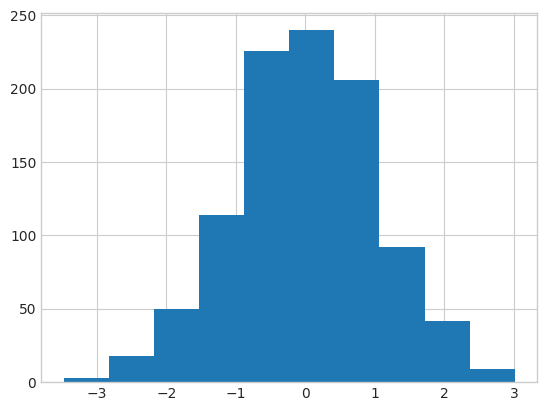

In [4]:
plt.hist(data)

(array([ 2.,  0.,  1.,  8.,  6.,  4., 10., 12., 28., 31., 44., 39., 78.,
        58., 90., 83., 81., 76., 85., 66., 55., 38., 38., 16., 20., 11.,
        11.,  6.,  0.,  3.]),
 array([-3.47304711, -3.25694535, -3.0408436 , -2.82474184, -2.60864008,
        -2.39253832, -2.17643656, -1.96033481, -1.74423305, -1.52813129,
        -1.31202953, -1.09592778, -0.87982602, -0.66372426, -0.4476225 ,
        -0.23152074, -0.01541899,  0.20068277,  0.41678453,  0.63288629,
         0.84898804,  1.0650898 ,  1.28119156,  1.49729332,  1.71339507,
         1.92949683,  2.14559859,  2.36170035,  2.57780211,  2.79390386,
         3.01000562]),
 [<matplotlib.patches.Polygon at 0x7f07af240220>])

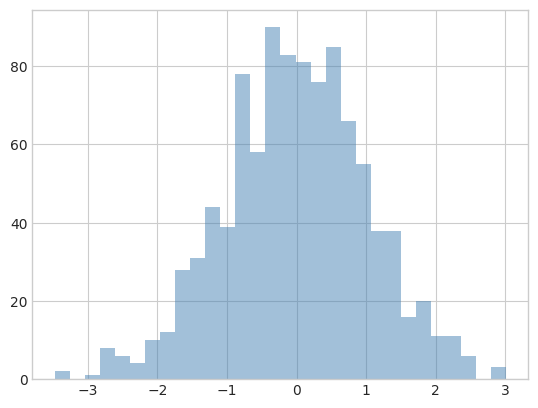

In [5]:
plt.hist(data, bins = 30, alpha = 0.5,
         histtype = 'stepfilled', color = 'steelblue',
         edgecolor = 'none')

(array([ 1.,  1.,  1.,  3.,  3.,  5.,  2.,  8., 12., 12., 13., 22., 33.,
        31., 39., 49., 36., 54., 38., 56., 64., 63., 56., 50., 43., 57.,
        48., 42., 46., 32., 14., 15., 17., 13., 10.,  5.,  4.,  1.,  0.,
         1.]),
 array([-3.41335316, -3.1109996 , -2.80864603, -2.50629247, -2.2039389 ,
        -1.90158534, -1.59923178, -1.29687821, -0.99452465, -0.69217108,
        -0.38981752, -0.08746396,  0.21488961,  0.51724317,  0.81959674,
         1.1219503 ,  1.42430386,  1.72665743,  2.02901099,  2.33136456,
         2.63371812,  2.93607168,  3.23842525,  3.54077881,  3.84313238,
         4.14548594,  4.4478395 ,  4.75019307,  5.05254663,  5.3549002 ,
         5.65725376,  5.95960732,  6.26196089,  6.56431445,  6.86666802,
         7.16902158,  7.47137514,  7.77372871,  8.07608227,  8.37843584,
         8.6807894 ]),
 [<matplotlib.patches.Polygon at 0x7f07af2c4400>])

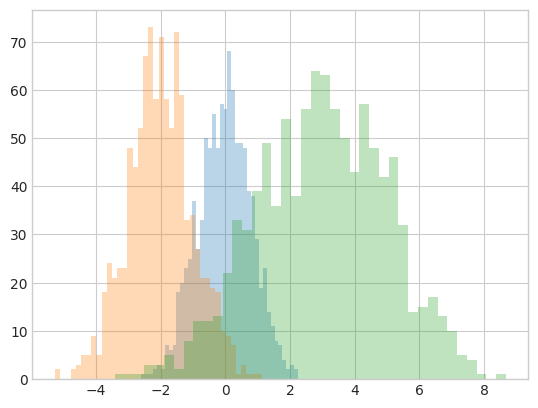

In [6]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', alpha = 0.3,
              bins = 40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [7]:
counts, bin_edges = np.histogram(data, bins = 5)
print(counts)

[ 21 164 466 298  51]


In [8]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

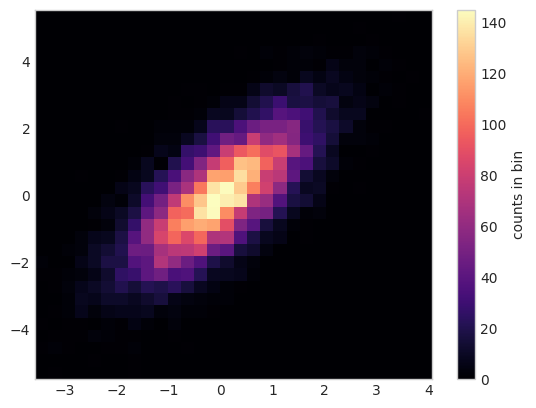

In [11]:
plt.hist2d(x, y, bins = 30, cmap = 'magma')
cb = plt.colorbar()
cb.set_label('counts in bin')

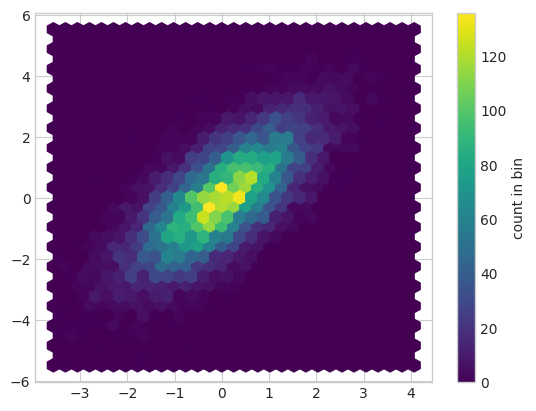

In [13]:
plt.hexbin(x, y, gridsize = 30, cmap = 'viridis')
cb = plt.colorbar(label = 'count in bin')

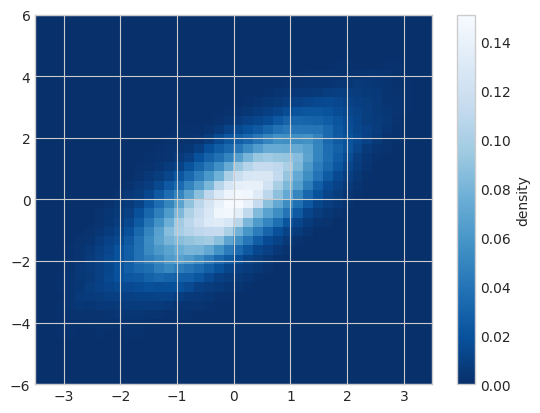

In [14]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues_r')
cb = plt.colorbar()
cb.set_label("density")